# задание 1

Используя датасеты о продуктах и их продажах посчитайте корреляции:
* Пирсона
* Спирмена
* Мэтьюса
* Крамера

Ход работы:
* Прочтите данные о продажах и продуктах
* Соедините таблицы друг с другом по id продукта
* Посчитайте корреляцию Спирмена временного ряда продаж каждого продукта с каждым, используя соединенную таблицу
* Посчитайте корреляцию Пирсона временного ряда продаж каждого продукта с каждым, используя соединенную таблицу
* Найдите наиболее коррелирующий товар с American Chicken Hot Dogs по значению корреляции Спирмена и Пиарсона
* Постройте график зависимости продаж American Chicken Hot Dogs от найденного товара (scatterplot) и постройте два графика 1) зависимости продаж American Chicken Hot Dogs от времени 2) зависимости продаж найденного товара от времени (lineplot).
* Найдите корреляцию Мэтьюса между recyclable_package и low_fat
* Постройте гистограммы recyclable_package и low_fat.
* Найдите корреляцию Крамера между store_id и brand_name. Есть ли корреляция между этими признаками?
* Визуализируйте зависимость store_id и brand_name. Тут подумайте, как это можно сделать.

In [31]:
import pandas as pd
from sklearn.metrics import matthews_corrcoef
from scipy.stats.contingency import association
import seaborn as sns

In [32]:
df_products = pd.read_csv("foodmart.products.csv")

df_products.head(5)

,product_class_id,product_id,brand_name,product_name,SKU,SRP,gross_weight,net_weight,recyclable_package,low_fat,units_per_case,cases_per_pallet,shelf_width,shelf_height,shelf_depth
0,30,1,Washington,Washington Berry Juice,90748583674,2.85,8.39,6.39,False,False,30,14,16.9,12.60,7.40
1,52,2,Washington,Washington Mango Drink,96516502499,0.74,7.42,4.42,False,True,18,8,13.4,3.71,22.60
2,52,3,Washington,Washington Strawberry Drink,58427771925,0.83,13.10,11.10,True,True,17,13,14.4,11.00,7.77
3,19,4,Washington,Washington Cream Soda,64412155747,3.64,10.60,9.60,True,False,26,10,22.9,18.90,7.93
4,19,5,Washington,Washington Diet Soda,85561191439,2.19,6.66,4.65,True,False,7,10,20.7,21.90,19.20


In [33]:
df_sales = pd.read_csv("foodmart.sales.csv")

df_sales.head(5)

,product_id,store_id,date,sales
0,4,6,1997-01-01,4
1,25,6,1997-01-01,3
2,48,6,1997-01-01,3
3,76,6,1997-01-01,4
4,119,6,1997-01-01,3


In [34]:
df = df_products.merge(df_sales, on="product_id")

In [35]:
sparse_sales = pd.pivot_table(
    df,
    values="sales",
    index=["date", "store_id"],
    columns=["product_name"],
    fill_value=0,
)

sparse_sales.head(5)

product_name         ADJ Rosy Sunglasses  Akron City Map  \
date       store_id                                        
1997-01-01 6                         0.0             0.0   
           14                        0.0             0.0   
1997-01-02 11                        0.0             0.0   
           23                        0.0             0.0   
1997-01-03 7                         0.0             0.0   

product_name         Akron Eyeglass Screwdriver  American Beef Bologna  \
date       store_id                                                      
1997-01-01 6                                0.0                    0.0   
           14                               0.0                    0.0   
1997-01-02 11                               0.0                    0.0   
           23                               0.0                    0.0   
1997-01-03 7                                0.0                    0.0   

product_name         American Chicken Hot Dogs  American Cole Slaw  \
date       store_id                                                  
1997-01-01 6                               0.0                 0.0   
           14                              0.0                 0.0   
1997-01-02 11                              0.0                 0.0   
           23                              0.0                 0.0   
1997-01-03 7                               0.0                 0.0   

product_name         American Corned Beef  American Foot-Long Hot Dogs  \
date       store_id                                                      
1997-01-01 6                          0.0                          0.0   
           14                         0.0                          0.0   
1997-01-02 11                         0.0                          0.0   
           23                         0.0                          0.0   
1997-01-03 7                          0.0                          0.0   

product_name         American Low Fat Bologna  American Low Fat Cole Slaw  \
date       store_id                                                         
1997-01-01 6                              0.0                         0.0   
           14                             0.0                         0.0   
1997-01-02 11                             0.0                         0.0   
           23                             0.0                         0.0   
1997-01-03 7                              0.0                         0.0   

product_name         ...  Washington Apple Juice  Washington Berry Juice  \
date       store_id  ...                                                   
1997-01-01 6         ...                     0.0                     0.0   
           14        ...                     0.0                     0.0   
1997-01-02 11        ...                     0.0                     0.0   
           23        ...                     0.0                     0.0   
1997-01-03 7         ...                     0.0                     4.0   

product_name         Washington Cola  Washington Cranberry Juice  \
date       store_id                                                
1997-01-01 6                     0.0                         0.0   
           14                    0.0                         0.0   
1997-01-02 11                    0.0                         0.0   
           23                    0.0                         0.0   
1997-01-03 7                     0.0                         0.0   

product_name         Washington Cream Soda  Washington Diet Cola  \
date       store_id                                                
1997-01-01 6                           4.0                   0.0   
           14                          0.0                   0.0   
1997-01-02 11                          0.0                   0.0   
           23                          0.0                   0.0   
1997-01-03 7                           0.0                   0.0   

product_name         Wa

In [36]:
spearman_corr = sparse_sales.corr(method="spearman")

spearman_corr

product_name,ADJ Rosy Sunglasses,Akron City Map,Akron Eyeglass Screwdriver,American Beef Bologna,American Chicken Hot Dogs,American Cole Slaw,American Corned Beef,American Foot-Long Hot Dogs,American Low Fat Bologna,American Low Fat Cole Slaw,...,Washington Apple Juice,Washington Berry Juice,Washington Cola,Washington Cranberry Juice,Washington Cream Soda,Washington Diet Cola,Washington Diet Soda,Washington Mango Drink,Washington Orange Juice,Washington Strawberry Drink
product_name,,,,,,,,,,,,,,,,,,,,,
ADJ Rosy Sunglasses,1.000000,0.097969,0.001993,0.041981,0.050371,-0.033882,-0.007844,0.077134,0.019108,-0.007614,...,0.033237,0.112359,0.076139,0.018318,0.005265,0.018996,0.018471,0.099764,0.039577,0.018928
Akron City Map,0.097969,1.000000,0.022436,0.098703,0.030165,0.030935,0.031788,-0.002137,0.047911,0.098667,...,0.005623,0.030795,0.039333,-0.001983,-0.053719,0.013590,0.040211,0.022333,0.090423,0.055622
Akron Eyeglass Screwdriver,0.001993,0.022436,1.000000,-0.036888,0.029858,0.076507,-0.005579,0.123704,0.052521,0.088301,...,-0.006781,0.004975,0.059180,0.067207,0.046000,-0.016040,-0.003019,0.040994,-0.001277,0.108524
American Beef Bologna,0.041981,0.098703,-0.036888,1.000000,0.027961,-0.032650,0.027374,-0.016565,-0.041241,0.070463,...,0.009394,0.063805,-0.057211,-0.022645,0.005515,0.092713,-0.007196,0.059298,0.059979,0.040561
American Chicken Hot Dogs,0.050371,0.030165,0.029858,0.027961,1.000000,0.014187,-0.000718,0.051069,0.048408,0.058423,...,0.082403,-0.019304,0.070678,0.071697,0.036806,0.062295,-0.021510,-0.007004,0.105569,0.000033
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Washington Diet Cola,0.018996,0.013590,-0.016040,0.092713,0.062295,-0.015969,0.050453,-0.003126,-0.007714,0.042247,...,-0.032531,-0.053064,-0.007445,-0.002923,0.037459,1.000000,0.015116,0.018770,0.025268,0.013656
Washington Diet Soda,0.018471,0.040211,-0.003019,-0.007196,-0.021510,0.074140,0.053977,0.020414,0.013718,-0.007546,...,-0.039151,0.047079,0.107883,0.088316,-0.019259,0.015116,1.000000,-0.025042,0.014216,-0.039504
Washington Mango Drink,0.099764,0.022333,0.040994,0.059298,-0.007004,0.091507,0.056937,0.021470,0.075320,0.011497,...,-0.028520,-0.024756,-0.003357,0.041751,0.159320,0.018770,-0.025042,1.000000,-0.000819,-0.048897


In [37]:
pearson_corr = sparse_sales.corr(method="pearson")

pearson_corr

product_name,ADJ Rosy Sunglasses,Akron City Map,Akron Eyeglass Screwdriver,American Beef Bologna,American Chicken Hot Dogs,American Cole Slaw,American Corned Beef,American Foot-Long Hot Dogs,American Low Fat Bologna,American Low Fat Cole Slaw,...,Washington Apple Juice,Washington Berry Juice,Washington Cola,Washington Cranberry Juice,Washington Cream Soda,Washington Diet Cola,Washington Diet Soda,Washington Mango Drink,Washington Orange Juice,Washington Strawberry Drink
product_name,,,,,,,,,,,,,,,,,,,,,
ADJ Rosy Sunglasses,1.000000,0.076608,-0.006581,0.038685,0.041105,-0.045887,-0.008466,0.062309,0.033752,-0.009656,...,0.053533,0.072249,0.061736,-0.000735,0.000843,0.028226,0.012653,0.089932,0.072668,0.035745
Akron City Map,0.076608,1.000000,0.026297,0.088709,0.061144,0.039347,0.019767,-0.005998,0.010270,0.078176,...,-0.021793,0.020514,0.051956,-0.001018,-0.032582,0.007142,0.035274,0.033875,0.078070,0.051952
Akron Eyeglass Screwdriver,-0.006581,0.026297,1.000000,-0.040851,0.034345,0.108726,0.007573,0.162355,0.020933,0.074292,...,-0.000237,-0.001297,0.049793,0.055047,0.031202,0.013510,-0.017855,0.022714,0.003156,0.163519
American Beef Bologna,0.038685,0.088709,-0.040851,1.000000,0.014780,-0.039118,-0.007890,-0.008264,-0.045949,0.085975,...,0.000197,0.081151,-0.053404,-0.021832,0.003286,0.090774,-0.031954,0.043843,0.080638,0.055211
American Chicken Hot Dogs,0.041105,0.061144,0.034345,0.014780,1.000000,-0.005336,0.017765,0.057972,0.071549,0.052460,...,0.098935,-0.024224,0.066212,0.043765,0.077541,0.045038,-0.037246,0.025975,0.129795,-0.008498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Washington Diet Cola,0.028226,0.007142,0.013510,0.090774,0.045038,-0.019134,0.065257,0.008475,-0.014765,0.040917,...,-0.021486,-0.048885,-0.024276,0.014478,0.023574,1.000000,0.018490,0.047577,0.005696,0.027834
Washington Diet Soda,0.012653,0.035274,-0.017855,-0.031954,-0.037246,0.080757,0.066493,0.034888,-0.001253,0.008366,...,-0.025958,0.037920,0.111450,0.090849,0.023312,0.018490,1.000000,-0.030056,0.009293,-0.046996
Washington Mango Drink,0.089932,0.033875,0.022714,0.043843,0.025975,0.087489,0.068372,0.028454,0.080489,0.013144,...,-0.020503,-0.031946,-0.026589,0.026534,0.116748,0.047577,-0.030056,1.000000,0.014672,-0.051093


In [38]:
target = "American Chicken Hot Dogs"

s_ans = spearman_corr[target].drop(target).idxmax()
p_ans = pearson_corr[target].drop(target).idxmax()

In [39]:
"spearman", s_ans, float(spearman_corr[target][s_ans])

('spearman', 'Great Cranberry Muffins', 0.1981052950789763)

In [40]:
"pearson", p_ans, float(pearson_corr[target][p_ans])

('pearson', 'Mighty Good Monthly Home Magazine', 0.24026934048270548)

<Axes: xlabel='Great Cranberry Muffins', ylabel='American Chicken Hot Dogs'>

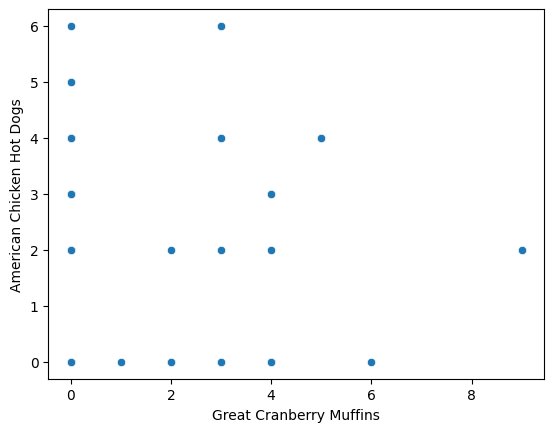

In [41]:
sns.scatterplot(
    x=sparse_sales[s_ans],
    y=sparse_sales["American Chicken Hot Dogs"],
)

<Axes: xlabel='Mighty Good Monthly Home Magazine', ylabel='American Chicken Hot Dogs'>

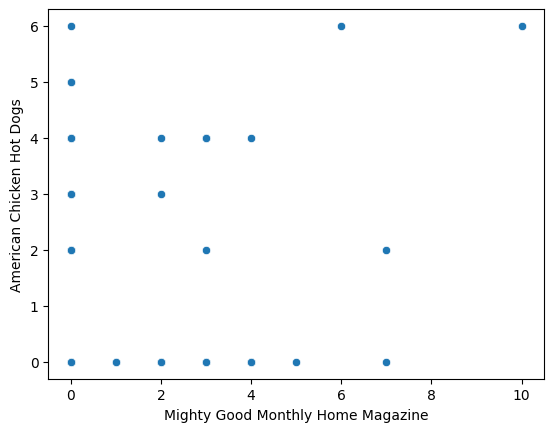

In [42]:
sns.scatterplot(
    x=sparse_sales[p_ans],
    y=sparse_sales["American Chicken Hot Dogs"],
)

<Axes: xlabel='date'>

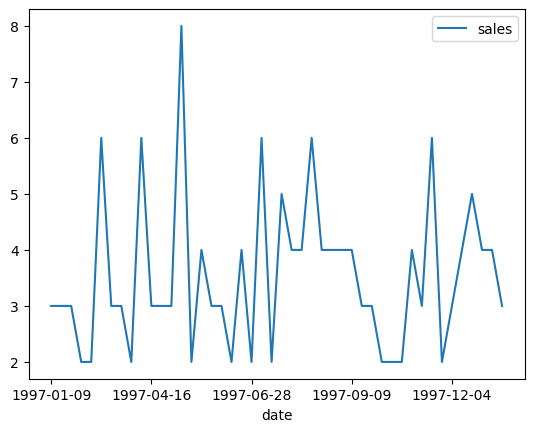

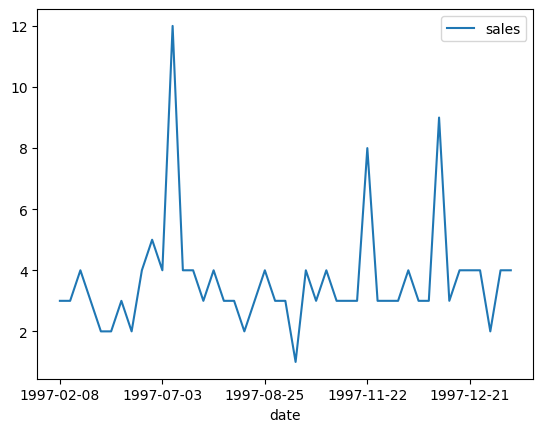

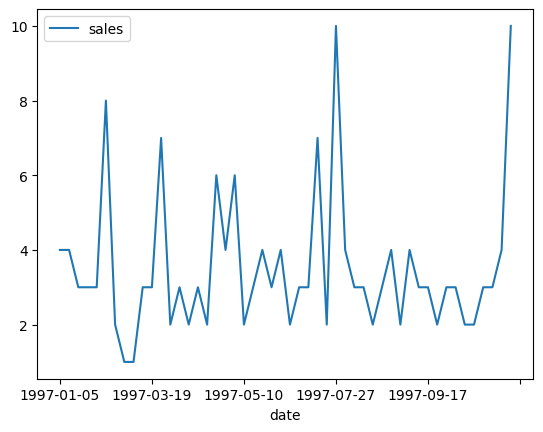

In [ ]:
df[df["product_name"] == target][["date", "sales"]].groupby(
    "date"
).sum().reset_index().plot.line(x="date", y="sales")

df[df["product_name"] == s_ans][["date", "sales"]].groupby(
    "date"
).sum().reset_index().plot.line(x="date", y="sales")

df[df["product_name"] == p_ans][["date", "sales"]].groupby(
    "date"
).sum().reset_index().plot.line(x="date", y="sales")

In [44]:
# matthews

matthews_corrcoef(df_products["low_fat"], df_products["recyclable_package"])

np.float64(-0.02675542252327238)

array([[<Axes: title={'center': 'low_fat'}>,
        <Axes: title={'center': 'recyclable_package'}>]], dtype=object)

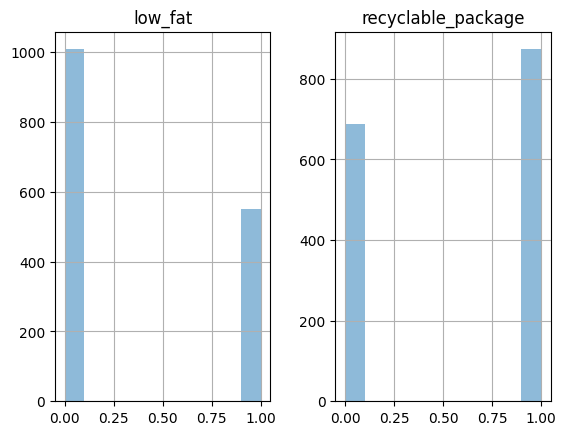

In [45]:
df_products[["low_fat", "recyclable_package"]].astype(float).hist(alpha=0.5)

In [46]:
crosstab = pd.crosstab(df["store_id"], df["brand_name"])

crosstab.head(5)

brand_name,ADJ,Akron,American,Amigo,Applause,Atomic,BBB Best,Best,Best Choice,Better,...,Thresher,Tip Top,Token,Top Measure,Toretti,Toucan,Tri-State,Urban,Walrus,Washington
store_id,,,,,,,,,,,,,,,,,,,,,
2,2,3,17,1,3,5,25,2,39,19,...,4,0,13,4,0,2,27,1,6,8
3,4,13,71,11,13,50,159,13,151,123,...,42,7,69,34,1,16,214,29,43,45
6,8,9,61,12,6,28,141,19,132,73,...,32,9,59,30,4,8,172,24,40,47
7,7,12,74,6,10,49,171,15,163,105,...,36,6,55,39,5,6,215,27,42,53
11,9,15,70,14,12,47,147,18,183,136,...,43,6,55,40,6,10,216,27,39,49


In [47]:
# cramer

association(crosstab, method="cramer")

0.0343024046787291

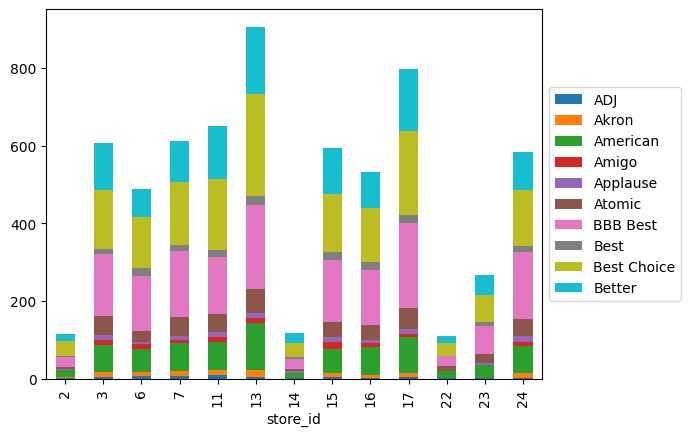

In [48]:
crosstab.iloc[:, :10].plot.bar(stacked=True).legend(
    loc="center left",
    bbox_to_anchor=(1, 0.5),
)

# задание 2

## описание задачи

В этом задании необходимо достичь максимального качества предсказания, используя навыки полученные за 4 недели обучения

Кто достигнет максимального значения на тестовой выборке, получит *15 баллов*

Пожалуйста, оформляйте ноутбук аккуратно. Все выводы подписывайте, оформляйте заголовки.

Для справедливой оценки все должны использовать одну и ту же часть исходного датасета в качестве тестового набора данных. Используйте разбиение приведенное ниже


```
train_test_split(X, y, test_size = 0.3, random_state = 69)
```
И модель, с которой вы работаете - это линейная регрессия. Другие алгоритмы не используйте.

Метрика, которую вы должны максимизировать

```
r2_score(y_test, y_pred) и root_mean_squared_error(y_test, y_pred)
```

Целевая переменная - *count*

Обратите внимание на столбцы - 'casual', 'registered'. Эти столбцы в сумме дают целевую переменную, по этой причине их надо удалить. Они линейно зависимы.

Используйтие средства библиотеки sklearn, внимательно изучите ее. Существует огромное количество методов для выполнения каждого из этапов, не бойтесь использовать методы неприведенные в лекции

Этапы, которые необходимо проделать в работе для успешного достижения результата:
* EDA (Исследовать данные, понять с чем имеете дело, наработать идеи для генерации фичей и их обработки, обязательно корреляционные матрицы и графики с hue=классы объектов)
* Анализ выбросов и их обработка (в задачах классификации выброс - это объект с таким признаковым описанием, которое отличается очень сильно от типичного и больше соответствует другому классу)
* Генерация новых фичей
* Обработка пропусков (вы можете сгенерировать новые фичи с пропусками, тогда надо подумать об их обработке)
* Обработка категориальных признаков
* Масштабирование вещественных признаков
* Трансформирование таргета
* Нелинейные автоматические трансформации признаков (Kernel Trick, Transfomers)
* Подбор параметров модели (можете менять не только константы, но и оптимизационные алгоритмы и методы регуляризации)
* Отбор признаков
* Обязательно: Составление пайплайна обучения
* Обязательно: Постройте график зависимости y_pred от y_true в разбиении на test и train. Предсказание идеального алгоритма даст прямую y=x, посмотрите какой график получается у вас.

## Bike Sharing Demand

По историческим данным о прокате велосипедов и погодным условиям необходимо оценить спрос на прокат велосипедов.

В наборе признаков присутсвуют вещественные, категориальные, и бинарные данные.

In [227]:
# импорт и чтение данных

import pandas as pd
import numpy as np
import seaborn as sns
import sklearn.preprocessing as ppc
from sklearn.metrics import root_mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV, LinearRegression
from matplotlib import pyplot as plt


data = pd.read_csv("bike_sharing_demand.csv")

data["datetime"] = data["datetime"].astype("datetime64[ns]")

In [228]:
# разбиение на обучающую и тестовую выборки

(X_train, X_test, y_train, y_test) = train_test_split(
    data.drop(columns=["count"], axis=1),
    data["count"],
    test_size=0.3,
    random_state=69,
)

data = pd.concat([X_train, y_train], axis=1)

In [229]:
# исследование данных 1

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7620 entries, 6867 to 7371
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    7620 non-null   datetime64[ns]
 1   season      7620 non-null   int64         
 2   holiday     7620 non-null   int64         
 3   workingday  7620 non-null   int64         
 4   weather     7620 non-null   int64         
 5   temp        7620 non-null   float64       
 6   atemp       7620 non-null   float64       
 7   humidity    7620 non-null   int64         
 8   windspeed   7620 non-null   float64       
 9   casual      7620 non-null   int64         
 10  registered  7620 non-null   int64         
 11  count       7620 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 773.9 KB


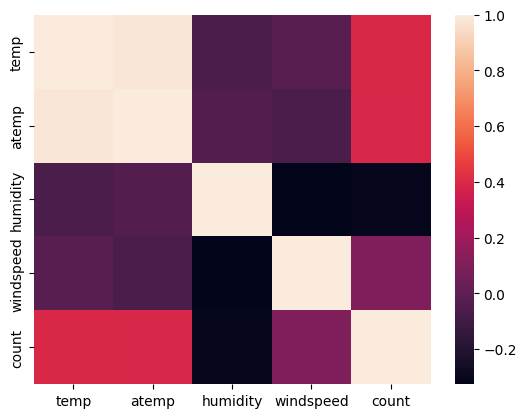

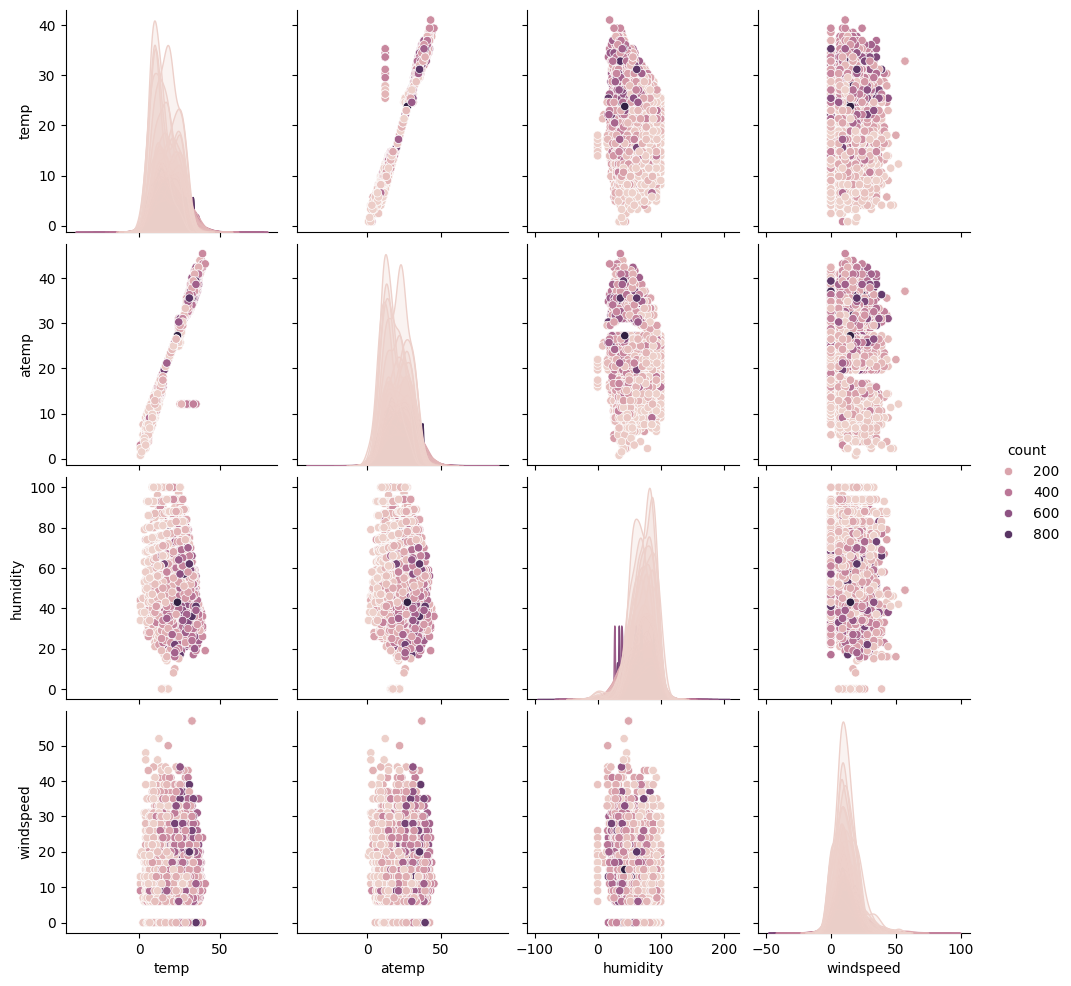

In [230]:
# исследование данных 2

show_data = data[["temp", "atemp", "humidity", "windspeed", "count"]]

sns.heatmap(show_data.corr())
sns.pairplot(show_data, hue="count")

<Axes: xlabel='count', ylabel='Density'>

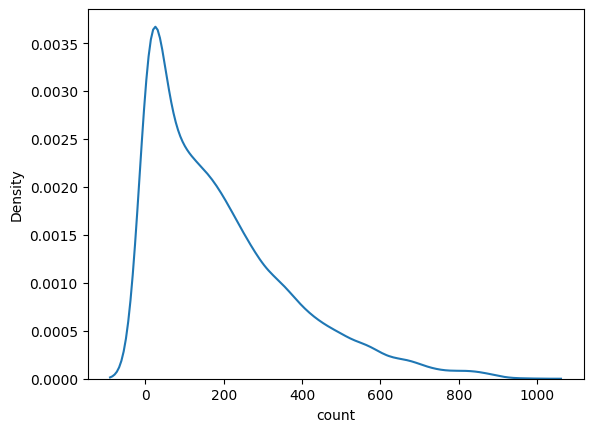

In [231]:
# график плотности таргета

sns.kdeplot(data=y_train)

In [232]:
# распределение колонок для анализа

numeric_cols = ["temp", "atemp", "humidity", "windspeed"]
categorical_cols = ["season", "weather", "holiday", "workingday"]

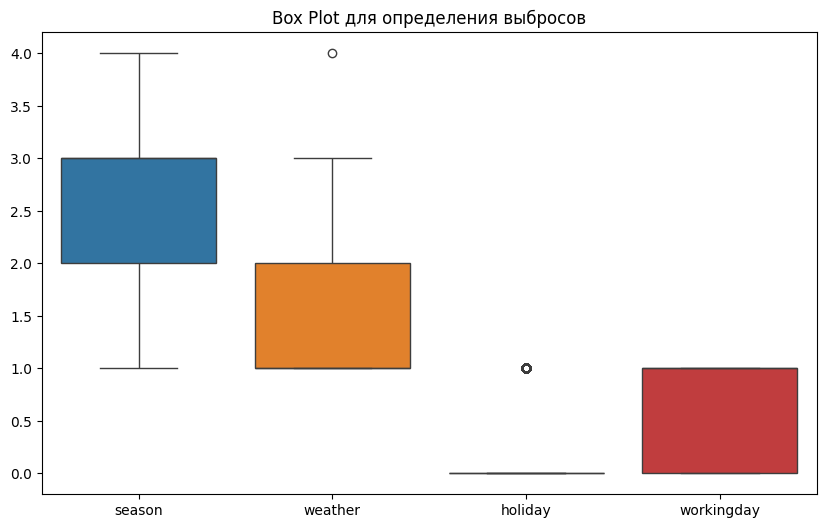

In [233]:
# проверим наличие выбросов категориальных признаков

plt.figure(figsize=(10, 6))
sns.boxplot(data=X_train[categorical_cols])
plt.title("Box Plot для определения выбросов")
plt.show()

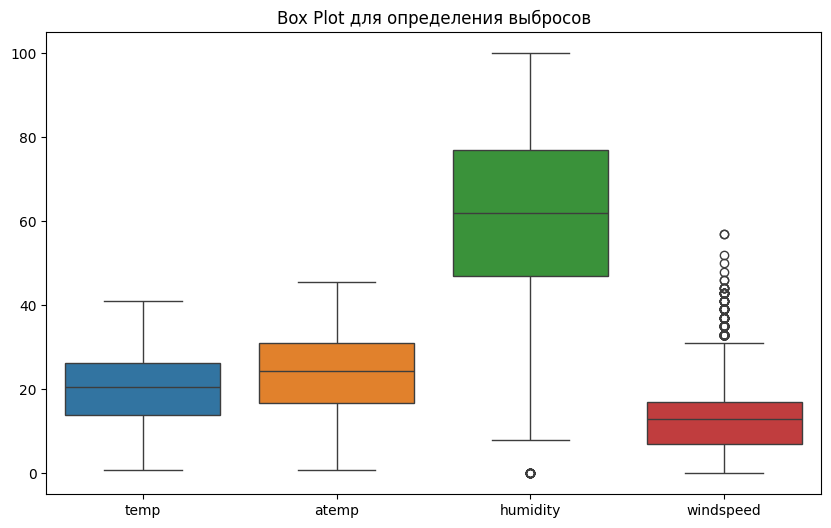

In [234]:
# проверим наличие выбросов числовых признаков

plt.figure(figsize=(10, 6))
sns.boxplot(data=X_train[numeric_cols])
plt.title("Box Plot для определения выбросов")
plt.show()

In [235]:
# # уберем выбросы категориальных признаков

# both = pd.concat([X_train, y_train], axis=1)

# for feature in ["weather", "humidity", "windspeed"]:
#     Q1 = X_train[feature].quantile(0.05)
#     Q3 = X_train[feature].quantile(0.95)
#     IQR = Q3 - Q1
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR

#     both = both[(both[feature] >= lower_bound) & (both[feature] <= upper_bound)]

# X_train = both[X_train.columns]
# y_train = both[y_train.name]

In [236]:
import numpy as np
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.discriminant_analysis import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, root_mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures
from sklearn.linear_model import Ridge

In [237]:
class DatetimeTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, datetime_column):
        self.datetime_column = datetime_column

    def fit(self, X, y=None):
        return self

    def transform(self, df: pd.DataFrame):
        df = df.copy()
        df["hour"] = df[self.datetime_column].dt.hour
        df["day"] = df[self.datetime_column].dt.day
        df["month"] = df[self.datetime_column].dt.month
        df["year"] = df[self.datetime_column].dt.year
        df["dayofweek"] = df[self.datetime_column].dt.dayofweek

        df["hour_sin"] = np.sin(2 * np.pi * df["hour"] / 24)
        df["hour_cos"] = np.cos(2 * np.pi * df["hour"] / 24)
        df["month_sin"] = np.sin(2 * np.pi * df["month"] / 12)
        df["month_cos"] = np.cos(2 * np.pi * df["month"] / 12)

        df.drop(
            columns=[self.datetime_column],
            inplace=True,
        )

        return df

In [238]:
data = pd.read_csv("bike_sharing_demand.csv")
data["datetime"] = pd.to_datetime(data["datetime"])

X = data.drop(columns=["count", "casual", "registered"], axis=1)
y = data["count"]

In [239]:
numeric_cols = [
    "temp",
    "atemp",
    "humidity",
    "windspeed",
    "hour_sin",
    "hour_cos",
    "month_sin",
    "month_cos",
]

categorical_cols = [
    "dayofweek",
    "season",
    "weather",
    "holiday",
    "workingday",
    "hour",
    "day",
    "month",
    "year",
]

In [240]:
import sklearn.preprocessing as ppc

numeric_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="mean")),
        ("scaler", ppc.StandardScaler()),
        (
            "transformer",
            ppc.SplineTransformer(
                n_knots=7,
                degree=7,
                order="F",
                extrapolation="linear",
            ),
        ),
    ]
)

categorical_transformer = Pipeline(
    steps=[
        (
            "encoder",
            OneHotEncoder(handle_unknown="ignore", sparse_output=False),
        )
    ]
)

In [ ]:
from sklearn.compose import TransformedTargetRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {
    "alpha": [15],
    "max_iter": [None],
}

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_cols),
        ("cat", categorical_transformer, categorical_cols),
    ]
)


pipe = Pipeline(
    steps=[
        ("datetime_features", DatetimeTransformer(datetime_column="datetime")),
        ("preprocessor", preprocessor),
        ("poly", PolynomialFeatures(2)),
        ("regressor", GridSearchCV(Ridge(), cv=5, n_jobs=4, param_grid=param_grid)),
    ]
)

In [242]:
clf = TransformedTargetRegressor(
    regressor=pipe,
    func=np.log1p,
    inverse_func=np.expm1,
)

clf.regressor

Pipeline(steps=[('datetime_features',
                 DatetimeTransformer(datetime_column='datetime')),
                ('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler()),
                                                                  ('transformer',
                                                                   SplineTransformer(degree=7,
                                                                                     extrapolation='linear',
                                                                                     n_knots=7,
                                                                                     order='F'))]),
                                                  ['temp', 'atemp', 'humidity',
                                                   'windspeed', 'hour_sin',
                                                   'hour_cos', 'month_sin',
                                                   'month_cos']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['dayofweek', 'season',
                                                   'weather', 'holiday',
                                                   'workingday', 'hour', 'day',
                                                   'month', 'year'])])),
                ('poly', PolynomialFeatures()),
                ('regressor',
                 GridSearchCV(cv=5, estimator=Ridge(), n_jobs=4,
                              param_grid={'alpha': [15], 'max_iter': [None]}))])

In [243]:
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)

print("test: \n")
print("r2:\t", r2)
print("rmse:\t", rmse)

test: 

r2:	 0.9439507959696026
rmse:	 42.968785925369424


In [244]:
clf.fit(X_test, y_test)

y_pred = clf.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)

print("train: \n")
print("r2:\t", r2)
print("rmse:\t", rmse)

train: 

r2:	 0.9649930507223559
rmse:	 33.95826482577083


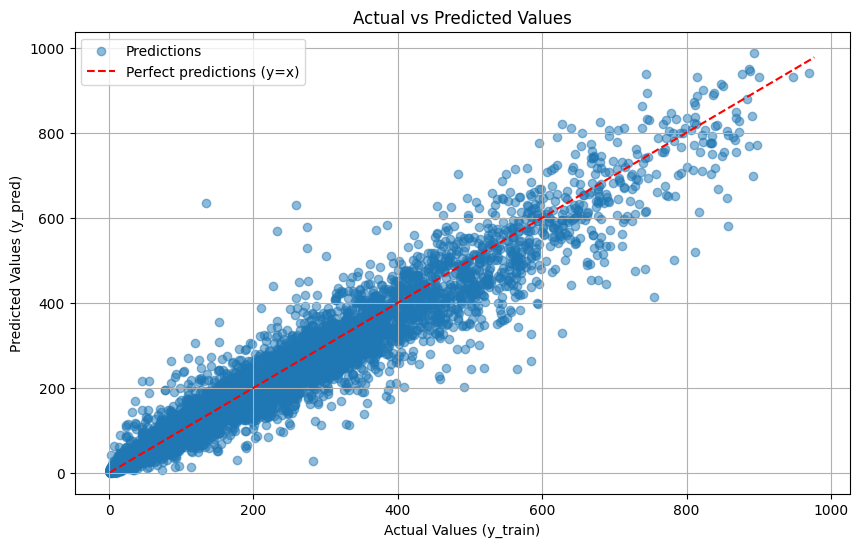

In [245]:
# зависимость предсказанных значений
# на обучающей выборке от реальных

import matplotlib.pyplot as plt
import numpy as np

y_pred_train = clf.predict(X_train)

plt.figure(figsize=(10, 6))

plt.scatter(y_train, y_pred_train, alpha=0.5, label="Predictions")

y_line = np.linspace(min(y_test), max(y_test), 100)
plt.plot(y_line, y_line, "--r", label="Perfect predictions (y=x)")

plt.xlabel("Actual Values (y_train)")
plt.ylabel("Predicted Values (y_pred)")
plt.title("Actual vs Predicted Values")
plt.legend()
plt.grid(True)

plt.show()

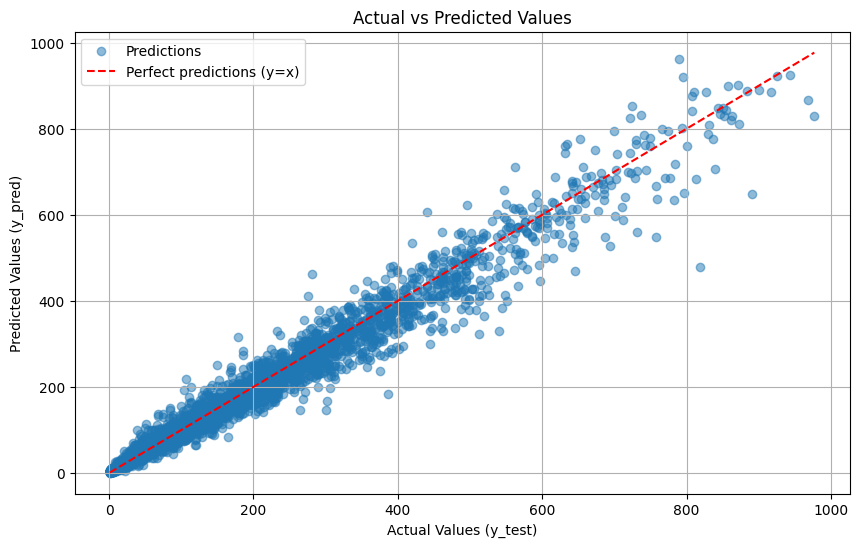

In [246]:
# зависимость предсказанных значений
# на тестовой выборке от реальных

import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 6))

plt.scatter(y_test, y_pred, alpha=0.5, label="Predictions")


y_line = np.linspace(min(y_test), max(y_test), 100)
plt.plot(y_line, y_line, "--r", label="Perfect predictions (y=x)")


plt.xlabel("Actual Values (y_test)")
plt.ylabel("Predicted Values (y_pred)")
plt.title("Actual vs Predicted Values")
plt.legend()
plt.grid(True)


plt.show()

In [ ]:
from sklearn.compose import TransformedTargetRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {
    "alpha": [15],
    "max_iter": [None],
}

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_cols),
        ("cat", categorical_transformer, categorical_cols),
    ]
)


pipe = Pipeline(
    steps=[
        ("datetime_features", DatetimeTransformer(datetime_column="datetime")),
        ("preprocessor", preprocessor),
        ("poly", PolynomialFeatures(2)),
        ("regressor", GridSearchCV(RandomForestRegressor(), cv=5, n_jobs=4, param_grid=param_grid)),
    ]
)